# Fine tune the last layer of vgg19 and resnet18

In [ ]:
from utils import *
from sklearn.metrics import classification_report

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
NUM_CLASSES = 10
random_seed = 1
batch_size = 1
dataset = TransformedMNIST()
test_dataset = dataset.get_test()
test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=batch_size, 
                         num_workers=8,
                         shuffle=False)
true = test_dataset.test_labels.numpy()

## Example

In [ ]:
model = models.vgg19(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
model.classifier[6] = nn.Linear(4096, NUM_CLASSES)

### load the fine tuned vgg19

In [ ]:
path = "/Users/yongquanqu/Desktop/pre_trained/vgg19.pt"
param_dict = torch.load(path)
model.load_state_dict(param_dict())
model.eval()

### test

In [ ]:
pred = []
for i, (features, targets) in enumerate(test_loader):  
    print(i)
    features = features.to(DEVICE)
    targets = targets.to(DEVICE)

    logits = model(features)
    _, predicted_labels = torch.max(logits, 1)
    pred.append(predicted_labels.numpy())

rep = classification_report(true, pred)
print(rep)

## RESULTS

### resnet18

the last layer: 
nn.Linear(512, 10)

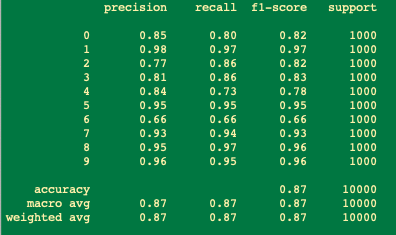

the last layer:
nn.Sequential(
    nn.Linear(512, 256), 
    nn.ReLU(), 
    nn.Dropout(0.5),
    nn.Linear(256, 10))    

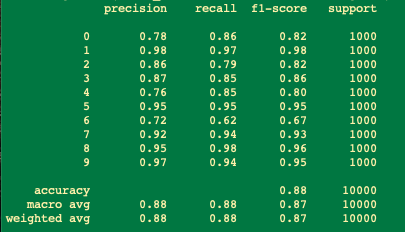

### vgg19

the last layer: 
nn.Linear(4096, 10)

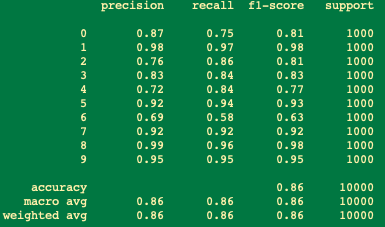

the last layer: nn.Sequential(
                      nn.Linear(4096, 512), 
                      nn.ReLU(), 
                      nn.Dropout(0.5),
                      nn.Linear(512, 10))

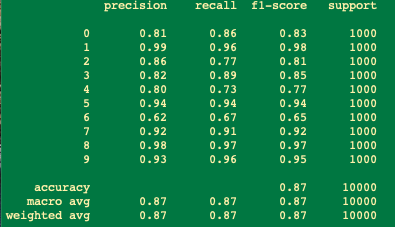